In [1]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

#TODO
      - missingness, imbalance

sleep classic -> asleep, restless, and awake 1 2 3
Calorie burn goal (caloriesOut) 

In [2]:
path_root = os.getcwd()+"/gates/raw/audere/data-export/2020-07-15"

paths_minlvl = glob.glob(path_root+"/activity/fitbit_minute_level_activity/*.parquet")
paths_daylvl = glob.glob(path_root+"/activity/fitbit_day_level_activity/*.parquet")
#os.listdir(root_path)

data_daylvl = pd.DataFrame()
for path in paths_daylvl:
    data_daylvl = pd.concat([data_daylvl, pq.read_table(path).to_pandas()])

#data_daylvl.to_csv('daylvl.csv') 

In [34]:
df_minlvl = pd.DataFrame()
sample_participants = ['b85911a544ad84a385e66f8ecfddd6a4','d2ef49804e963cfa6fc4074c25eafa6f']
for path in paths_minlvl:
    df_file =  pq.read_table(path).to_pandas()
    df_sample = df_file.loc[df_file.participant_id.isin(sample_participants)]
    df_minlvl = pd.concat([df_minlvl, df_sample])



In [111]:
df_minlvl.sort_values('timestamp')

,participant_id,timestamp,steps,sleep_classic,heart_rate
2162871,d2ef49804e963cfa6fc4074c25eafa6f,2019-12-28 00:00:00,0.0,2.0,79.0
2162664,d2ef49804e963cfa6fc4074c25eafa6f,2019-12-28 00:01:00,0.0,2.0,80.0
2163373,d2ef49804e963cfa6fc4074c25eafa6f,2019-12-28 00:02:00,0.0,2.0,79.0
2164698,d2ef49804e963cfa6fc4074c25eafa6f,2019-12-28 00:03:00,0.0,2.0,80.0
2163191,d2ef49804e963cfa6fc4074c25eafa6f,2019-12-28 00:04:00,0.0,1.0,78.0
...,...,...,...,...,...
1682316,b85911a544ad84a385e66f8ecfddd6a4,2020-06-02 23:55:00,0.0,NaN,0.0
1683927,b85911a544ad84a385e66f8ecfddd6a4,2020-06-02 23:56:00,0.0,NaN,0.0
1682004,b85911a544ad84a385e66f8ecfddd6a4,2020-06-02 23:57:00,0.0,NaN,0.0
1685472,b85911a544ad84a385e66f8ecfddd6a4,2020-06-02 23:58:00,0.0,NaN,0.0


In [79]:
df_daylvl.loc[df_daylvl.participant_id == 'd2ef49804e963cfa6fc4074c25eafa6f'].total_in_bed_minutes.describe()

count    121.00000
mean     452.68595
std       59.55810
min      304.00000
25%      416.00000
50%      453.00000
75%      482.00000
max      591.00000
Name: total_in_bed_minutes, dtype: float64

In [90]:
a.groupby(by = a.timestamp.dt.date).sleep_classic

In [109]:
len(a)

177120

In [108]:
pd.date_range(a.timestamp.iloc[0].to_pydatetime(),a.timestamp.iloc[-1].to_pydatetime(), freq='1min')

DatetimeIndex(['2020-01-26 00:00:00', '2020-01-26 00:01:00',
               '2020-01-26 00:02:00', '2020-01-26 00:03:00',
               '2020-01-26 00:04:00', '2020-01-26 00:05:00',
               '2020-01-26 00:06:00', '2020-01-26 00:07:00',
               '2020-01-26 00:08:00', '2020-01-26 00:09:00',
               ...
               '2020-06-02 23:50:00', '2020-06-02 23:51:00',
               '2020-06-02 23:52:00', '2020-06-02 23:53:00',
               '2020-06-02 23:54:00', '2020-06-02 23:55:00',
               '2020-06-02 23:56:00', '2020-06-02 23:57:00',
               '2020-06-02 23:58:00', '2020-06-02 23:59:00'],
              dtype='datetime64[ns]', length=185760, freq='T')

In [16]:
df_daylvl.loc[df_daylvl.participant_id.isin(['b85911a544ad84a385e66f8ecfddd6a4','d2ef49804e963cfa6fc4074c25eafa6f'])]

,Unnamed: 0,participant_id,date,resting_heart_rate,main_start_time,main_in_bed_minutes,main_efficiency,nap_count,total_asleep_minutes,total_in_bed_minutes,activityCalories,caloriesOut,caloriesBMR,marginalCalories,sedentaryMinutes,lightlyActiveMinutes,fairlyActiveMinutes,veryActiveMinutes
1159,1159,b85911a544ad84a385e66f8ecfddd6a4,2020-02-15,70.0,2020-02-15T01:04:00.000,171.0,82.0,0.0,133.0,171.0,2202.0,3990.0,2158.0,1291.0,875.0,342.0,23.0,25.0
7157,4249,b85911a544ad84a385e66f8ecfddd6a4,2020-05-09,77.0,NaN,NaN,NaN,NaN,NaN,NaN,825.0,2825.0,2158.0,418.0,1241.0,176.0,0.0,0.0
7476,4568,d2ef49804e963cfa6fc4074c25eafa6f,2020-02-07,70.0,2020-02-06T23:10:00.000,396.0,58.0,0.0,229.0,396.0,1169.0,2085.0,1139.0,564.0,621.0,423.0,0.0,0.0
10293,1261,b85911a544ad84a385e66f8ecfddd6a4,2020-05-17,73.0,2020-05-17T17:01:00.000,64.0,80.0,0.0,51.0,64.0,1779.0,3674.0,2158.0,1068.0,1078.0,235.0,54.0,9.0
10645,1613,d2ef49804e963cfa6fc4074c25eafa6f,2020-01-03,73.0,2020-01-02T21:32:00.000,453.0,48.0,0.0,218.0,453.0,728.0,1684.0,1139.0,306.0,695.0,292.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601495,1197,b85911a544ad84a385e66f8ecfddd6a4,2020-06-01,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1857.0,3709.0,2158.0,1129.0,1128.0,238.0,53.0,21.0
604468,4170,b85911a544ad84a385e66f8ecfddd6a4,2020-03-07,74.0,2020-03-07T14:52:30.000,119.0,53.0,1.0,144.0,200.0,1520.0,3458.0,2158.0,896.0,979.0,263.0,4.0,2.0
604469,4171,b85911a544ad84a385e66f8ecfddd6a4,2020-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,2203.0,2158.0,24.0,1429.0,11.0,0.0,0.0
604470,4172,b85911a544ad84a385e66f8ecfddd6a4,2020-05-08,77.0,2020-05-08T00:22:30.000,206.0,76.0,0.0,156.0,206.0,282.0,2407.0,2158.0,137.0,1173.0,61.0,0.0,0.0


In [9]:
df_daylvl= pd.read_csv('gates_data_csv/activity_daylvl.csv')
df_daylvl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606266 entries, 0 to 606265
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            606266 non-null  int64  
 1   participant_id        606266 non-null  object 
 2   date                  606266 non-null  object 
 3   resting_heart_rate    562612 non-null  float64
 4   main_start_time       545224 non-null  object 
 5   main_in_bed_minutes   545224 non-null  float64
 6   main_efficiency       545224 non-null  float64
 7   nap_count             545224 non-null  float64
 8   total_asleep_minutes  545224 non-null  float64
 9   total_in_bed_minutes  545224 non-null  float64
 10  activityCalories      602696 non-null  float64
 11  caloriesOut           602696 non-null  float64
 12  caloriesBMR           602696 non-null  float64
 13  marginalCalories      602696 non-null  float64
 14  sedentaryMinutes      602696 non-null  float64
 15  

In [14]:
df_daylvl.participant_id.value_counts()[290:296]

b2a8aa8b37fe02ea0bb8f3cb935480cd    127
d2ef49804e963cfa6fc4074c25eafa6f    127
b85911a544ad84a385e66f8ecfddd6a4    127
2bfcd7a6550ba919befa3f450b695dae    127
185a919bf20a8955976f18b62b2551b7    127
0382a23f1a9f1a62434258e7888e25bd    127
Name: participant_id, dtype: int64

In [21]:
df_daylvl.participant_id.value_counts().tail(100)

dd007a5e987069a2581a5339f700bd3e    37
bc7482482bd34d3b7c8bf07391ec7558    36
8cef86607c153cdd7b33d197b0488159    36
ffbac65f1176f9e66227c0e409db30e5    36
66a2aa44f1cdebf3911449373a227b5b    35
                                    ..
1dac4b11abdf694e01a492e41c42b6de     2
c74b94190d5b4e8c2c8d48ff64dfa122     2
c751df498358cd01a44797b2f357494e     1
03a2650ec9c6eff478ca4d27b3ca2b59     1
68626e53677a69f67c93e7e8a27bda2c     1
Name: participant_id, Length: 100, dtype: int64

In [8]:
#Convert to datetime objects
df_daylvl['date'] = pd.to_datetime(df_daylvl.date)
df_daylvl['main_start_time'] = pd.to_datetime(df_daylvl.main_start_time)

In [139]:
# Create data set for weekday/weekend classification. Drop all missing (mostly sleep data) and undersample weekdays
df_daylvl = df_daylvl.dropna()

df_daylvl['weekday'] = df_daylvl.date.dt.weekday
df_daylvl = df_daylvl.assign(weekend=lambda df:df_daylvl.weekday >= 5 )

df_daylvl = df_daylvl.drop(['Unnamed: 0', 'participant_id', 'date', 'main_start_time', 'weekday'], axis = 1)

under_samp_weekday = df_daylvl.loc[df_daylvl.weekend == False].sample(n = (536853 - 382665), replace = False )

undersamp = pd.concat([under_samp_weekday, df_daylvl.loc[df_daylvl.weekend == True]])

undersamp.info()

<AxesSubplot:xlabel='total_in_bed_minutes', ylabel='total_asleep_minutes'>

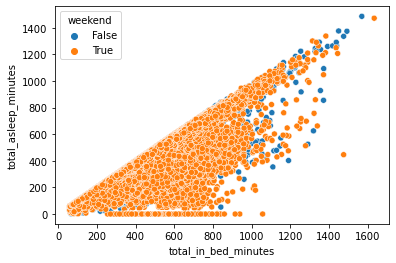

In [176]:
#sns.catplot(x="nap_count", y = "sedentaryMinutes", hue='weekend', kind = "bar", data = undersamp)
#sns.displot(undersamp, x = "total_in_bed_minutes", hue = "weekend")
sns.scatterplot(data = undersamp, x = 'total_in_bed_minutes', y = 'total_asleep_minutes', hue = 'weekend' )

In [67]:
#Load minute level activity data. Use 10% - 20% sample for easier data manipulation
data_minlvl = pd.DataFrame()
for i in range(0,200,10):
    data_minlvl = pd.concat([data_minlvl, pq.read_table(paths_minlvl[i]).to_pandas()])
    print(i)
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

0
2020-11-03 10:42:39
10
2020-11-03 10:42:40
20
2020-11-03 10:42:41
30
2020-11-03 10:42:41
40
2020-11-03 10:42:42
50
2020-11-03 10:42:43
60
2020-11-03 10:42:44
70
2020-11-03 10:42:46
80
2020-11-03 10:42:47
90
2020-11-03 10:42:49
100
2020-11-03 10:42:50
110
2020-11-03 10:42:52
120
2020-11-03 10:42:54
130
2020-11-03 10:42:56
140
2020-11-03 10:42:58
150
2020-11-03 10:43:00
160
2020-11-03 10:43:02
170
2020-11-03 10:43:05
180
2020-11-03 10:43:07
190
2020-11-03 10:43:10


In [68]:
data_minlvl.describe(include=np.object)

,participant_id
count,83054933
unique,5195
top,b4fb8b1bdfe1bd4b17641d266b747d07
freq,23462


In [69]:
data_minlvl.tail()

,participant_id,timestamp,steps,sleep_classic,heart_rate
4150991,a1c4b505e2098c264c8beaed9d651284,2020-04-18 07:44:00,0.0,1.0,63.0
4150992,a1c4b505e2098c264c8beaed9d651284,2020-04-18 09:20:00,0.0,NaN,75.0
4150993,a1c4b505e2098c264c8beaed9d651284,2020-04-18 11:48:00,0.0,NaN,78.0
4150994,a1c4b505e2098c264c8beaed9d651284,2020-04-18 19:11:00,0.0,NaN,0.0
4150995,a1c4b505e2098c264c8beaed9d651284,2020-04-18 19:20:00,0.0,NaN,70.0


In [20]:
sample_particip = data_minlvl.loc[data_minlvl.participant_id == 'a1c4b505e2098c264c8beaed9d651284']

In [21]:
sample_particip['timestamp'].max() - sample_particip['timestamp'].min()

Timedelta('121 days 23:53:00')

In [76]:
sample_particip.groupby(sample_particip['timestamp'].dt.month).describe()

steps                                                  \
            count      mean        std  min  25%  50%  75%    max   
timestamp                                                           
1          8914.0  4.219094  12.382327  0.0  0.0  0.0  0.0  110.0   
2          8403.0  4.741521  13.534305  0.0  0.0  0.0  0.0  113.0   
3          8971.0  4.730799  13.378959  0.0  0.0  0.0  0.0  118.0   
4          5219.0  3.969343  12.698354  0.0  0.0  0.0  0.0  127.0   
12         3758.0  4.194518  12.916130  0.0  0.0  0.0  0.0  111.0   

          sleep_classic            ...           heart_rate             \
                  count      mean  ...  75%  max      count       mean   
timestamp                          ...                                   
1                2969.0  1.109801  ...  1.0  3.0     8914.0  71.186673   
2                2769.0  1.098953  ...  1.0  3.0     8403.0  70.361300   
3                3045.0  1.088998  ...  1.0  3.0     8971.0  71.568498   
4                1654.0  1.090085  ...  1.0  3.0     5219.0  71.244683   
12               1176.0  1.101190  ...  1.0  3.0     3758.0  73.373869   

                                                    
                 std  min   25%   50%   75%    max  
timestamp                                           
1          14.594367  0.0  65.0  70.0  77.0  125.0  
2          17.963408  0.0  64.0  70.0  78.0  122.0  
3          14.539006  0.0  65.0  71.0  78.0  123.0  
4          14.382649  0.0  65.0  71.0  77.0  120.0  
12         13.991458  0.0  68.0  73.0  79.0  116.0  

[5 rows x 24 columns]

<AxesSubplot:ylabel='Frequency'>

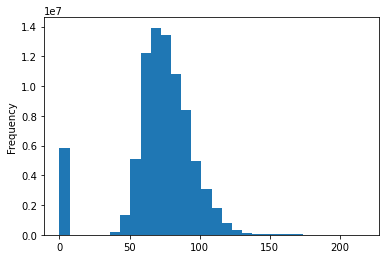

In [81]:
data_minlvl['heart_rate'].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

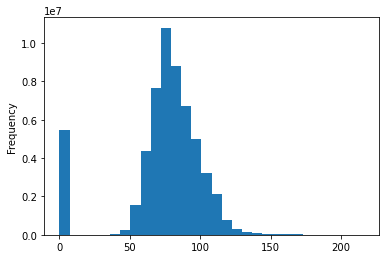

In [90]:
data_minlvl.loc[data_minlvl.sleep_classic.isnull()]['heart_rate'].plot.hist(bins=30)

In [121]:
data_minlvl.loc[~data_minlvl.heart_rate.isnull() 
                & ~data_minlvl.steps.isnull() 
                & ~(data_minlvl.heart_rate == 0.0)].participant_id.value_counts().mean()*10/(24*60)

102.53178254121174

<AxesSubplot:ylabel='Frequency'>

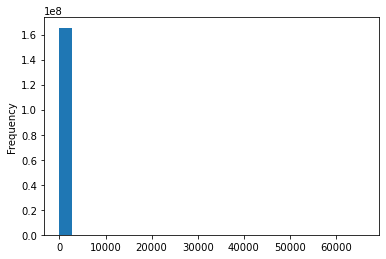

In [61]:
data_minlvl.steps.plot.hist(bins=25)

In [22]:
data_minlvl.describe(include=np.object)

,participant_id
count,830609547
unique,5195
top,b4fb8b1bdfe1bd4b17641d266b747d07
freq,234720


In [25]:
dumm.to_csv('dumm.csv')

In [24]:
data_minlvl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830609547 entries, 0 to 4152361
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   participant_id  object        
 1   timestamp       datetime64[ns]
 2   steps           float64       
 3   sleep_classic   float64       
 4   heart_rate      float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 37.1+ GB


In [2]:
df_day = pd.read_csv('gates_data_csv/activity_daylvl.csv')

In [3]:
df_day.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606266 entries, 0 to 606265
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            606266 non-null  int64  
 1   participant_id        606266 non-null  object 
 2   date                  606266 non-null  object 
 3   resting_heart_rate    562612 non-null  float64
 4   main_start_time       545224 non-null  object 
 5   main_in_bed_minutes   545224 non-null  float64
 6   main_efficiency       545224 non-null  float64
 7   nap_count             545224 non-null  float64
 8   total_asleep_minutes  545224 non-null  float64
 9   total_in_bed_minutes  545224 non-null  float64
 10  activityCalories      602696 non-null  float64
 11  caloriesOut           602696 non-null  float64
 12  caloriesBMR           602696 non-null  float64
 13  marginalCalories      602696 non-null  float64
 14  sedentaryMinutes      602696 non-null  float64
 15  

<AxesSubplot:>

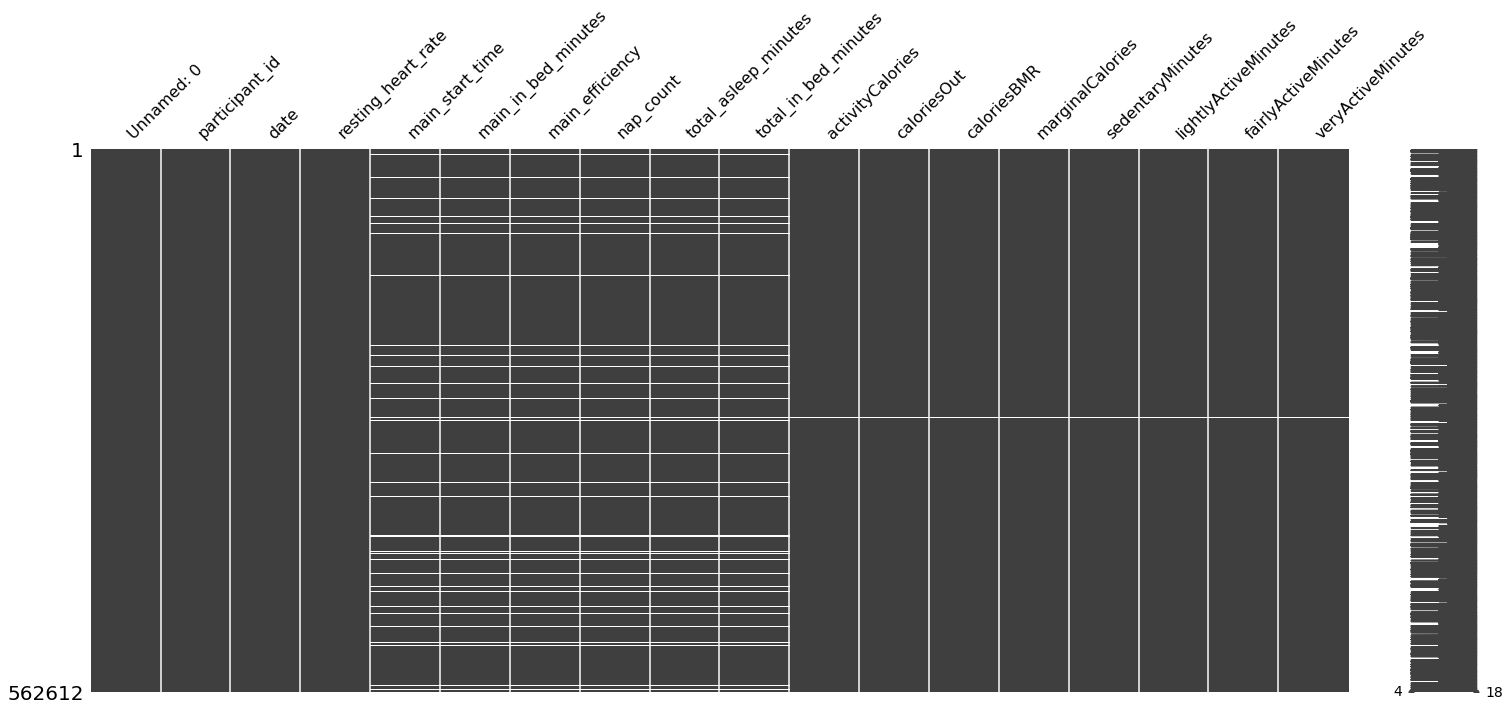

In [6]:
msno.matrix(df_day.sort_values(by = 'participant_id').dropna(subset = ['resting_heart_rate']))

In [10]:
df_day.sort_values(by = 'participant_id').head(100)

,Unnamed: 0,participant_id,date,resting_heart_rate,main_start_time,main_in_bed_minutes,main_efficiency,nap_count,total_asleep_minutes,total_in_bed_minutes,activityCalories,caloriesOut,caloriesBMR,marginalCalories,sedentaryMinutes,lightlyActiveMinutes,fairlyActiveMinutes,veryActiveMinutes
25536,4131,001ff8d5662587ed0ccc23a6d249c40c,2020-02-29,69.0,2020-02-29T00:06:00.000,523.0,90.0,0.0,471.0,523.0,1092.0,2701.0,1757.0,558.0,655.0,254.0,8.0,0.0
441360,1135,001ff8d5662587ed0ccc23a6d249c40c,2020-02-15,69.0,2020-02-14T23:44:00.000,337.0,99.0,0.0,334.0,337.0,1617.0,3309.0,1757.0,948.0,774.0,271.0,52.0,6.0
407998,4141,001ff8d5662587ed0ccc23a6d249c40c,2020-04-06,71.0,2020-04-05T22:56:00.000,329.0,96.0,0.0,317.0,329.0,2752.0,4035.0,1753.0,1659.0,575.0,407.0,76.0,53.0
453558,1161,001ff8d5662587ed0ccc23a6d249c40c,2020-04-25,66.0,2020-04-24T23:08:00.000,347.0,97.0,1.0,442.0,454.0,2073.0,3488.0,1753.0,1307.0,606.0,269.0,43.0,68.0
413913,4027,001ff8d5662587ed0ccc23a6d249c40c,2020-01-24,66.0,2020-01-24T00:12:30.000,449.0,94.0,0.0,410.0,449.0,2608.0,4003.0,1757.0,1680.0,533.0,292.0,69.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438344,4162,001ff8d5662587ed0ccc23a6d249c40c,2020-04-29,67.0,2020-04-29T00:27:30.000,409.0,99.0,0.0,406.0,409.0,2164.0,3607.0,1753.0,1408.0,658.0,232.0,58.0,83.0
444412,4187,001ff8d5662587ed0ccc23a6d249c40c,2020-03-05,67.0,2020-03-04T23:08:00.000,391.0,95.0,0.0,373.0,391.0,3259.0,4483.0,1757.0,2094.0,476.0,340.0,160.0,73.0
22497,1092,001ff8d5662587ed0ccc23a6d249c40c,2020-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4462.0,5407.0,1753.0,2919.0,371.0,415.0,195.0,152.0
411048,1162,001ff8d5662587ed0ccc23a6d249c40c,2020-02-27,66.0,2020-02-26T23:47:30.000,342.0,87.0,3.0,835.0,947.0,630.0,2386.0,1757.0,337.0,351.0,122.0,20.0,0.0
